<span style="font-size:24px; font-weight:bold;">PART 1: DATA HANDLING AND PREPROCESSING

<span style="font-size:16px; font-weight:bold;">1.Data Understanding

<span style="font-size:12px; font-weight:bold;">I)Giving an overview of the data

In [148]:
#import the libraries to be used throughout the project
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import expon
from scipy.stats import zscore
from scipy.stats import ttest_ind
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
import joblib

In [7]:
#use pandas to read the dataset
df = pd.read_csv('Documents/Africa Agility/datasets/Loan Prediction data.csv')
#make a copy of the dataset
df.copy()
#Read the first five rows of the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
#check the total number of rows and columns of the dataset
df.shape

(614, 13)

In [11]:
#Identify the different columns in the dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
#check the data types of the columns
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [15]:
#check the columns which have missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
#check the count of unique values in the dataset
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [19]:
#gives the actual data that comprises the unique values 
property_area = np.unique(df['Property_Area'].values)
print(f"Property_area: {property_area}")
credit_history = np.unique(df['Credit_History'].values)
print(f"Credit_History: {credit_history}")
loan_status = np.unique(df['Loan_Status'].values)
print(f"Loan_status: {loan_status}")
education = np.unique(df['Education'].values)
print(f"Education: {education}")
gender = np.unique(df['Gender'].values.astype(str))
print(f"Gender: {gender}")
self_employed = np.unique(df['Self_Employed'].values.astype(str))
print(f"Self_Employed: {self_employed}")
dependents = np.unique(df['Dependents'].values.astype(str))
print(f"Dependents: {dependents}")
married = np.unique(df['Married'].values.astype(str))
print(f"Married: {married}")

Property_area: ['Rural' 'Semiurban' 'Urban']
Credit_History: [ 0.  1. nan]
Loan_status: ['N' 'Y']
Education: ['Graduate' 'Not Graduate']
Gender: ['Female' 'Male' 'nan']
Self_Employed: ['No' 'Yes' 'nan']
Dependents: ['0' '1' '2' '3+' 'nan']
Married: ['No' 'Yes' 'nan']


In [21]:
#check the value of the differnt elements consisting a single column
gender_counts = df['Gender'].value_counts()
print(gender_counts)
married_counts = df['Married'].value_counts()
print(married_counts)
education_counts = df['Education'].value_counts()
print(education_counts)
self_employed_counts = df['Self_Employed'].value_counts()
print(self_employed_counts)
loan_status_counts = df['Loan_Status'].value_counts()
print(loan_status_counts)
property_area_counts = df['Property_Area'].value_counts()
print(property_area_counts)

Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Yes    398
No     213
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Loan_Status
Y    422
N    192
Name: count, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


In [23]:
#checking the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0



The dataset could help the financial Institution know the loanees who have defaulted

<span style="font-size:16px; font-weight:bold;">2.Data cleaning

<span style="font-size:12px; font-weight:bold;">I)Checking for missing values and handling them

In [28]:
#check for duplicates
df.duplicated().sum()

0

In [30]:
#gives the total number of missing values for each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
#gives the total number of misssing values
df.isnull().sum().sum()

149

In [34]:
#fill the missing values with either the mode(for categorical data) or the median(for numerical data)
df_cleaned = df["Gender"].fillna(df["Gender"].mode().iloc[0], inplace=True)
df_cleaned = df["Married"].fillna(df["Married"].mode().iloc[0], inplace=True)
df_cleaned = df["Self_Employed"].fillna(df["Self_Employed"].mode().iloc[0], inplace=True)
df_cleaned = df["Dependents"].fillna(df["Dependents"].mode().iloc[0], inplace=True)
df_cleaned = df["LoanAmount"].fillna(df["LoanAmount"].median(), inplace=True)
df_cleaned = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode().iloc[0], inplace=True)
df_cleaned = df[ "Credit_History"].fillna(df[ "Credit_History"].mode().iloc[0], inplace=True)

#remove irrelevant columns in the dataset
df_cleaned = df.drop(columns=['Loan_ID'])
df_cleaned.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
#check if the null values have been filled
df_cleaned.isnull().sum().sum()

0

In [38]:
#grouping the categorical data and converting them to numerical values
categorical_cols = ["Gender", "Married", "Education", "Self_Employed", "Property_Area", "Loan_Status", "Dependents"]
categorical_cols

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Dependents']

In [40]:
#creating a numerical column
num_features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
num_features

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

<span style="font-size:12px; font-weight:bold;">II)Detecting and handling outliers using zscore

Dataset before outlier detection: 614, Dataset after outlier detection: 614


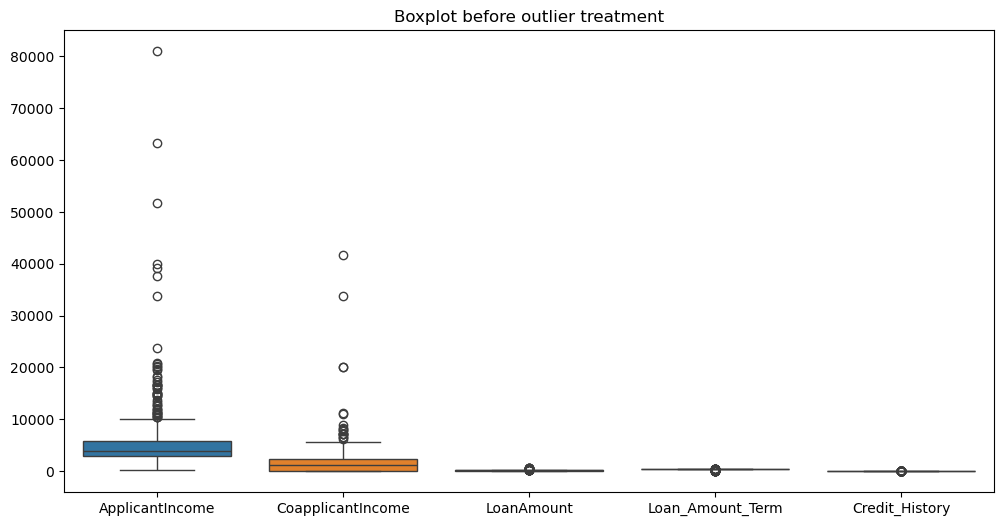

In [43]:
#outlier detection
z_sore = stats.zscore(df_cleaned[num_features])
abs_z_score = np.abs(z_sore)
filtered_entities = (abs_z_score > 3 )
df_cleaned_no_outliers = df_cleaned[filtered_entities]
print(f"Dataset before outlier detection: {len(df_cleaned)}, Dataset after outlier detection: {len(df_cleaned_no_outliers)}")

#Boxplot to visualize presence of outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[num_features])
plt.title("Boxplot before outlier treatment")
plt.show()

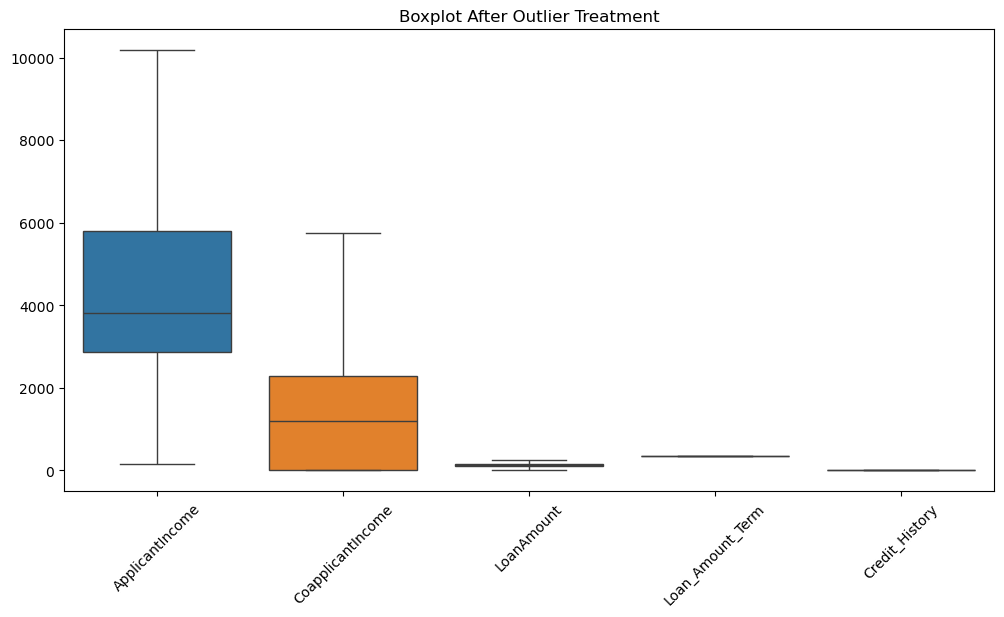

In [44]:
#define Q1, Q3 and the interquartile range
Q1 = df_cleaned[num_features].quantile(0.25)
Q3 = df_cleaned[num_features].quantile(0.75)
IQR = Q3 - Q1

#define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply clipping per column to handle outliers
for col in num_features:
    df_cleaned[col] = df_cleaned[col].clip(lower_bound[col], upper_bound[col])

# Replot boxplot to confirm outliers are treated
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[num_features])
plt.xticks(rotation=45)
plt.title("Boxplot After Outlier Treatment")
plt.show()

<span style="font-size:16px; font-weight:bold;">3.Exploratory Data Analysis

<span style="font-size:12px; font-weight:bold;">I)Plotting Distributions of numerical columns

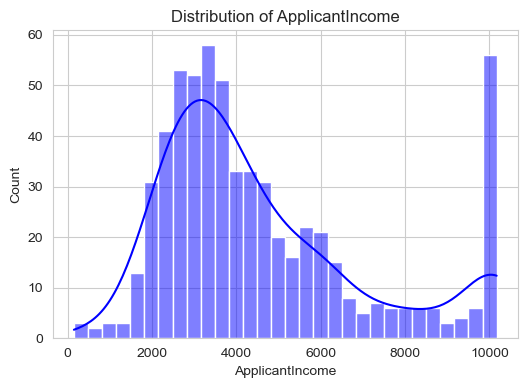

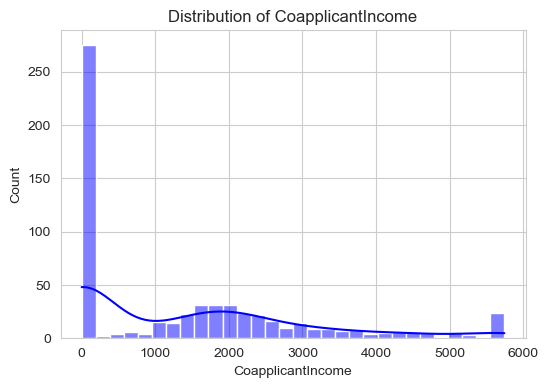

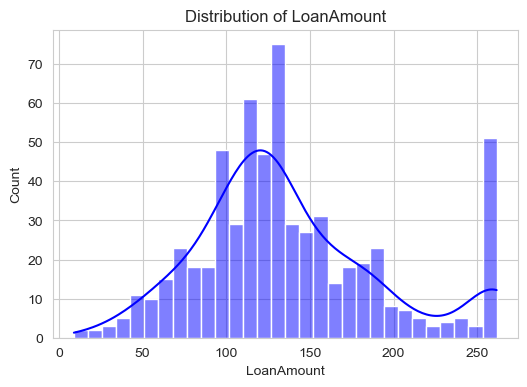

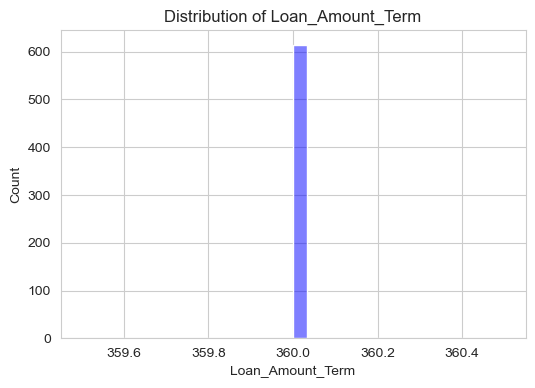

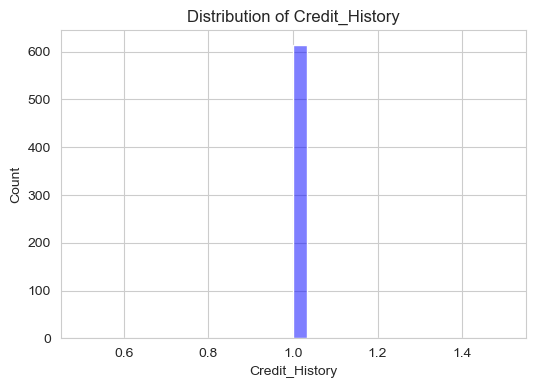

In [48]:
for cols in num_features:
    sns.set_style('whitegrid')
    plt.figure(figsize=(6, 4))
    sns.histplot(df_cleaned[cols], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {cols}")
    plt.show()

<span style="font-size:12px; font-weight:bold;">II)Plotting Distributions of categorical columns

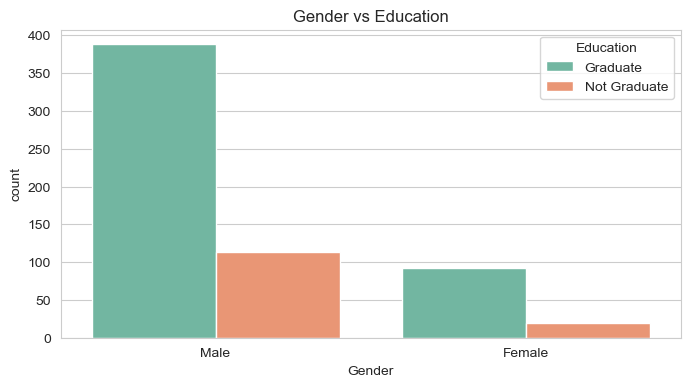

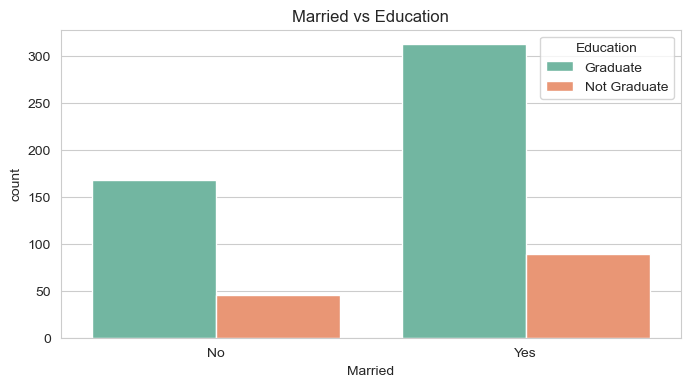

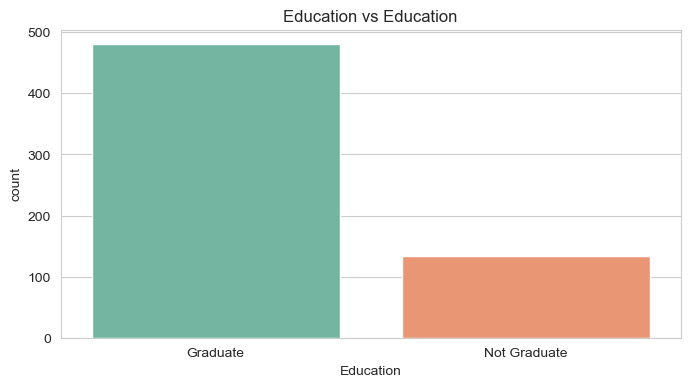

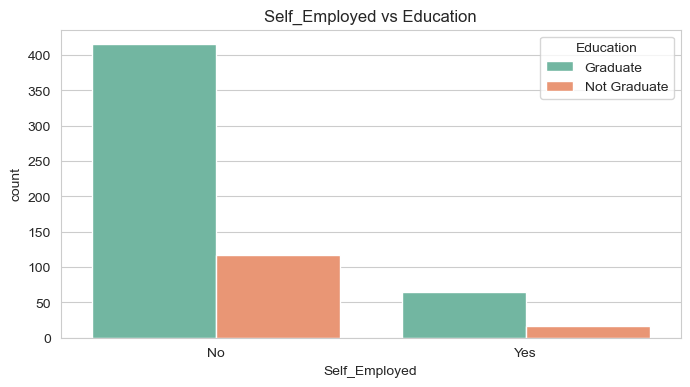

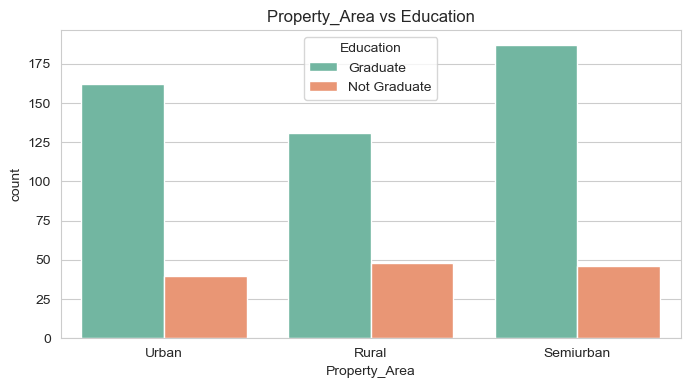

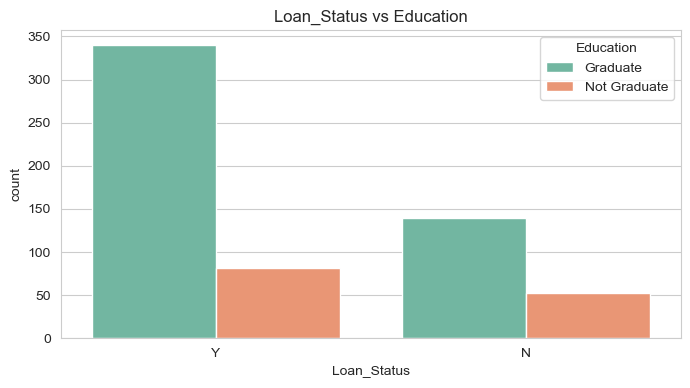

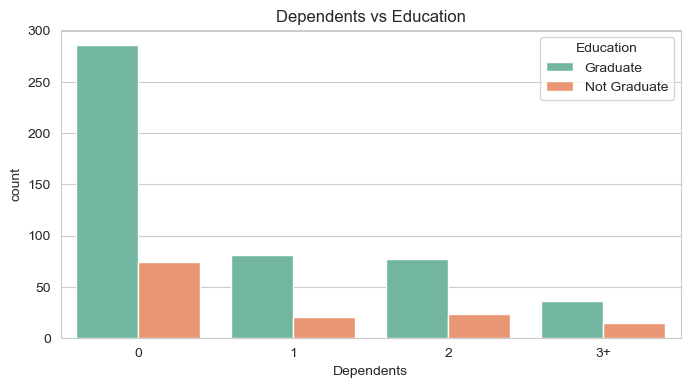

In [51]:
for cols in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df_cleaned[cols], hue=df['Education'], palette="Set2")
    plt.title(f'{cols} vs Education')
    plt.show()

<span style="font-size:12px; font-weight:bold;">III)Visualization to check if the dataset is balanced

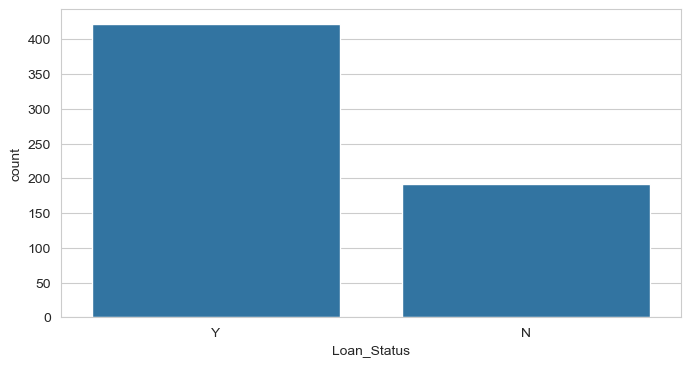

In [53]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df['Loan_Status'])
plt.show()

<span style="font-size:16px; font-weight:bold;">4.Feature Engineering

<span style="font-size:16px; font-weight:bold;">I).Creating a New Column

In [56]:
df_cleaned['Total_Income'] = df_cleaned['CoapplicantIncome'] + df_cleaned['ApplicantIncome']
df_cleaned.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<span style="font-size:16px; font-weight:bold;">II).Feature Selection

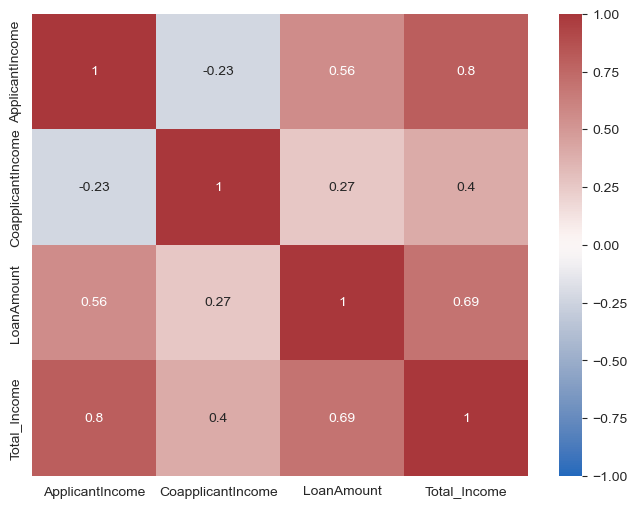

In [58]:
num_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Total_Income"]
corr = df_cleaned[num_cols].corr(numeric_only=True)
#plotting the correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='vlag', vmin=-1, vmax=1)
plt.show()

In [59]:
# dropping highly correlated features
df_cleaned = df_cleaned.drop(columns = ['ApplicantIncome'])

<span style="font-size:16px; font-weight:bold;">5.Data Preprocessing

<span style="font-size:12px; font-weight:bold;">I)Performing Normalization

In [62]:
#performing normalization
scaler = MinMaxScaler()
num = ["CoapplicantIncome", "LoanAmount", "Total_Income"]
df_cleaned[num] = scaler.fit_transform(df_cleaned[num])
df_cleaned.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,0.000000,0.471287,360.0,1.0,Urban,Y,0.304511
1,Male,Yes,1,Graduate,No,0.262575,0.471287,360.0,1.0,Rural,N,0.321233
2,Male,Yes,0,Graduate,Yes,0.000000,0.225743,360.0,1.0,Urban,Y,0.107653
3,Male,Yes,0,Not Graduate,No,0.410578,0.439604,360.0,1.0,Urban,Y,0.241771
4,Male,No,0,Graduate,No,0.000000,0.522772,360.0,1.0,Urban,Y,0.314945


<span style="font-size:12px; font-weight:bold;">II)Performing One-Hot Encoding

In [65]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['Dependents'])
# data.columns
df_cleaned.head()

,Gender,Married,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,Male,No,Graduate,No,0.000000,0.471287,360.0,1.0,Urban,Y,0.304511,True,False,False,False
1,Male,Yes,Graduate,No,0.262575,0.471287,360.0,1.0,Rural,N,0.321233,False,True,False,False
2,Male,Yes,Graduate,Yes,0.000000,0.225743,360.0,1.0,Urban,Y,0.107653,True,False,False,False
3,Male,Yes,Not Graduate,No,0.410578,0.439604,360.0,1.0,Urban,Y,0.241771,True,False,False,False
4,Male,No,Graduate,No,0.000000,0.522772,360.0,1.0,Urban,Y,0.314945,True,False,False,False


<span style="font-size:12px; font-weight:bold;">III)Performing Label Encoding

In [67]:
# apply label encoding
cat_col = ["Gender", "Married", "Education", "Self_Employed", "Property_Area", "Loan_Status"]
encoder = LabelEncoder()
for col in cat_col:
    df_cleaned[col] = encoder.fit_transform(df_cleaned[col])
df_cleaned.head()

,Gender,Married,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,1,0,0,0,0.000000,0.471287,360.0,1.0,2,1,0.304511,True,False,False,False
1,1,1,0,0,0.262575,0.471287,360.0,1.0,0,0,0.321233,False,True,False,False
2,1,1,0,1,0.000000,0.225743,360.0,1.0,2,1,0.107653,True,False,False,False
3,1,1,1,0,0.410578,0.439604,360.0,1.0,2,1,0.241771,True,False,False,False
4,1,0,0,0,0.000000,0.522772,360.0,1.0,2,1,0.314945,True,False,False,False


<span style="font-size:24px; font-weight:bold;">PART 2: PROBABILITY AND STATISTICS FOR MACHINE LEARNING

<span style="font-size:16px; font-weight:bold;">1.Descriptive statistics

<span style="font-size:12px; font-weight:bold;">I)Computing and Interpreting measures of central tendency and dispersion

In [72]:
#calculating the mean, mode, median, standard deviation and variance of LoanAmount
mean_LoanAmount = df_cleaned['LoanAmount'].mean()
mode_LoanAmount = df_cleaned['LoanAmount'].mode()
median_LoanAmount = df_cleaned['LoanAmount'].median()
std_LoanAmount = df_cleaned['LoanAmount'].std()
var_LoanAmount = df_cleaned['LoanAmount'].var()
print(f"Mean: {mean_LoanAmount},Median: {median_LoanAmount}, var: {var_LoanAmount}, std: {std_LoanAmount},  Mode: {mode_LoanAmount}")

Mean: 0.5083787531847648,Median: 0.47128712871287126, var: 0.048801182109799265, std: 0.2209098959073569,  Mode: 0    1.0
Name: LoanAmount, dtype: float64


In [81]:
#calculating the mean, mode, median, standard deviation and variance of Total Income
mean_total_income = df_cleaned['Total_Income'].mean()
mode_total_income = df_cleaned['Total_Income'].mode()
median_total_income = df_cleaned['Total_Income'].median()
std_total_income = df_cleaned['Total_Income'].std()
var_total_income = df_cleaned['Total_Income'].var()
print(f"Mean: {mean_total_income}, Median: {median_total_income}, var: {var_total_income}, std: {std_total_income},  Mode: {mode_total_income}")

Mean: 0.31748858046932665, Median: 0.2746266594114649, var: 0.03315441748450052, std: 0.18208354534251722,  Mode: 0    0.603166
Name: Total_Income, dtype: float64


In [83]:
#calculating the mean, mode, median, standard deviation and variance of Loan_Amount_Term
mean_loanterm = df['Loan_Amount_Term'].mean()
mode_loanterm = df['Loan_Amount_Term'].mode()
median_loanterm = df['Loan_Amount_Term'].median()
std_loanterm = df['Loan_Amount_Term'].std()
var_loanterm = df['Loan_Amount_Term'].var()
print(f"Mean: {mean_loanterm}, Var: {var_loanterm}, Std: {std_loanterm}, Median: {median_loanterm}, Mode: {mode_loanterm}")

Mean: 342.4104234527687, Var: 4151.048243539801, Std: 64.42862906767301, Median: 360.0, Mode: 0    360.0
Name: Loan_Amount_Term, dtype: float64


In [85]:
#calculating the mean, mode, median, standard deviation and variance of Credit_History
mean_credithistory = df['Credit_History'].mean()
mode_credithistory = df['Credit_History'].mode()
median_credithistory = df['Credit_History'].median()
std_credithistory = df['Credit_History'].std()
var_credithistory = df['Credit_History'].var()
print(f"Mean: {mean_credithistory}, Var: {var_credithistory}, Std: {std_credithistory}, Median: {median_credithistory}, Mode: {mode_credithistory}")

Mean: 0.8550488599348535, Var: 0.12414249353050996, Std: 0.3523386063583013, Median: 1.0, Mode: 0    1.0
Name: Credit_History, dtype: float64


Probability distribution of "LoanAmount" is exponential since exponential distribution is used in cases where small values occur more frequently than large values and in the case of loan amounts, many people borrow small loans and large loans are rare.

<span style="font-size:12px; font-weight:bold;">II)Plotting and Interpreting the Probability Distribution 

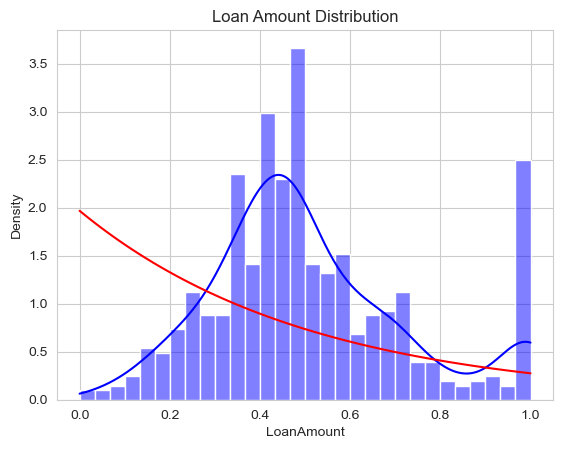

In [89]:
sns.histplot(df_cleaned["LoanAmount"], bins=30, kde=True, color='blue', stat="density")
x = np.linspace(0,df_cleaned['LoanAmount'].max(), 100)
plt.plot(x, expon.pdf(x, scale=df_cleaned["LoanAmount"].mean()), 'r', label="Exponential Fit")
plt.title("Loan Amount Distribution")
plt.show()

The probability histogram shows that majority of the people borrow small loans

<span style="font-size:12px; font-weight:bold;">III)Determining the skewness and kurtosis of the LoanAmount

In [93]:
sk = df_cleaned['LoanAmount'].skew()
kt = df_cleaned['LoanAmount'].kurtosis()
print(f"Skewness: {sk}, Kurtosis: {kt}")

Skewness: 0.6836926591947373, Kurtosis: 0.11249284826177997


<span style="font-size:12px; font-weight:bold;">IV)Determining the skewness and kurtosis of the Total Income

In [96]:
sk = df_cleaned['Total_Income'].skew()
kt = df_cleaned['Total_Income'].kurtosis()
print(f"Skewness: {sk}, Kurtosis: {kt}")

Skewness: 0.9821895816980067, Kurtosis: 0.7129116361440464


<span style="font-size:16px; font-weight:bold;">3. Hypothesis Testing

<span style="font-size:12px; font-weight:bold;">I)Hypothesis test to compare loan amounts for married and unmarried applicants using t-statistic

In [100]:
#create the variables for married and not married
married = df_cleaned[df_cleaned['Married']==0]['Total_Income']
not_married = df_cleaned[df_cleaned['Married']==1]['Total_Income']

#perform the ttest
t_stat, p_value = stats.ttest_ind(married, not_married)
print(f"T-statistic: {t_stat:.4f}, P_value: {p_value}")

#check if their is difference in loan amount between married and unmarried applicants
if p_value < t_stat:
    print("Reject the null hypothesis: Marriage affects loan amount")
else:
     print("Accept the null hypothesis: No significant difference in  loan amount between the two groups")

T-statistic: -3.9465, P_value: 8.849853259569864e-05
Accept the null hypothesis: No significant difference in  loan amount between the two groups


<span style="font-size:12px; font-weight:bold;">II)Hypothesis test to determine if loan approval rate is independent of applicant gender using chi-statistic

In [103]:
#create the variables for approved and not approved
loan_approved = df_cleaned[df_cleaned['LoanAmount']==0]['Gender']
loan_notapproved = df_cleaned[df_cleaned['LoanAmount']==1]['Gender']

#create a contingency table
def compute_confidence_interval(df_cleaned, confidence = 0.95):
    mean = np.mean(df_cleaned)
    se = np.sem(df_cleaned)
    h = se * stats.t.ppf((1 + confidence)/2., len(df_cleaned)-1)
    return mean -h, mean +h
    
#perform the chi2 test
contingency_table = pd.crosstab(df_cleaned['Gender'], df_cleaned['Loan_Status'])
chi2,p,dof,expected = stats.chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2:.4f}, P-value: {p:.4f}")

#check if loan status and gender are dependent
if p < chi2:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis:Loan status is independent of gender")

Chi-squared statistic: 0.1109, P-value: 0.7391
Accept the null hypothesis:Loan status is independent of gender


<span style="font-size:24px; font-weight:bold;">PART 3. MACHINE LEARNING MODEL BUILDING

<span style="font-size:16px; font-weight:bold;">1.Choosing the classification algorithms to use

<span style="font-size:12px; font-weight:bold;">I shall use the following algorithms:

1. Random Forest Classifier.
2. Decision Tree Classifier.
3. K-Nearest Neighbors.
4. Logistic Regression.

<span style="font-size:16px; font-weight:bold;">2. Splitting Train and Test data

<span style="font-size:12px; font-weight:bold;">I)Applying SMOTE To our Train data to balance it and Selecting the best features

In [110]:
#convert loan status to binary
df["Loan_Status"] = df["Loan_Status"].map({"Y": 1, "N": 0})

#define x, y variables
x = df_cleaned.drop(columns=['Loan_Status'], axis=1)
y = df_cleaned['Loan_Status']#The target variable

#split data into training and testing sets, 80% for training, 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#applying SMOTE
smote = SMOTE(sampling_strategy = 'auto', random_state = 42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

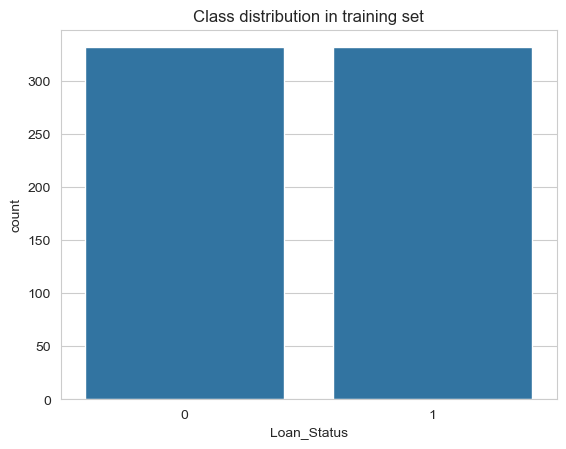

{0: 332, 1: 332}


In [111]:
#check class distribution after applying SMOTE
sns.countplot(x=y_train_resampled)
plt.title("Class distribution in training set")
plt.show()
#print class counts
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(dict(zip(unique, counts)))

<span style="font-size:16px; font-weight:bold;">3. Training and Testing the models:

<span style="font-size:12px; font-weight:bold;">a. Logistic Regression

In [116]:
lr = LogisticRegression(max_iter=18, random_state=42)
#train the logistic regression classifier
lr.fit(x_train_resampled, y_train_resampled)
#making predictions on the model
y_pred = lr.predict(x_test)
y_proba = lr.predict_proba(x_test)[:, 1]
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy on test set: 0.5853658536585366
[[21 12]
 [39 51]]
              precision    recall  f1-score   support

           0       0.35      0.64      0.45        33
           1       0.81      0.57      0.67        90

    accuracy                           0.59       123
   macro avg       0.58      0.60      0.56       123
weighted avg       0.69      0.59      0.61       123



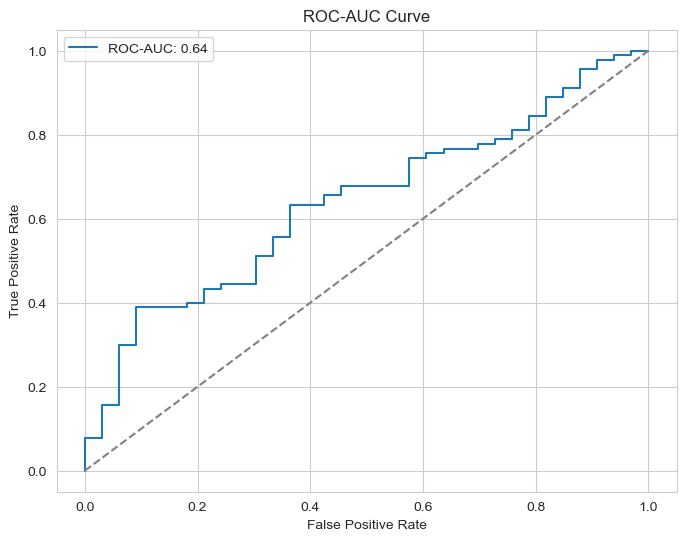

In [118]:
# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC-AUC: {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

<span style="font-size:12px; font-weight:bold;">b.Decision Tree Classifier

In [120]:
dt = DecisionTreeClassifier(max_depth = 10, random_state = 42)
#train the logistic regression classifier
dt.fit(x_train_resampled, y_train_resampled)
#making predictions on the model
y_pred = dt.predict(x_test)
y_proba = dt.predict_proba(x_test)[:, 1]
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy on test set: 0.6260162601626016
[[20 13]
 [33 57]]
              precision    recall  f1-score   support

           0       0.38      0.61      0.47        33
           1       0.81      0.63      0.71        90

    accuracy                           0.63       123
   macro avg       0.60      0.62      0.59       123
weighted avg       0.70      0.63      0.65       123



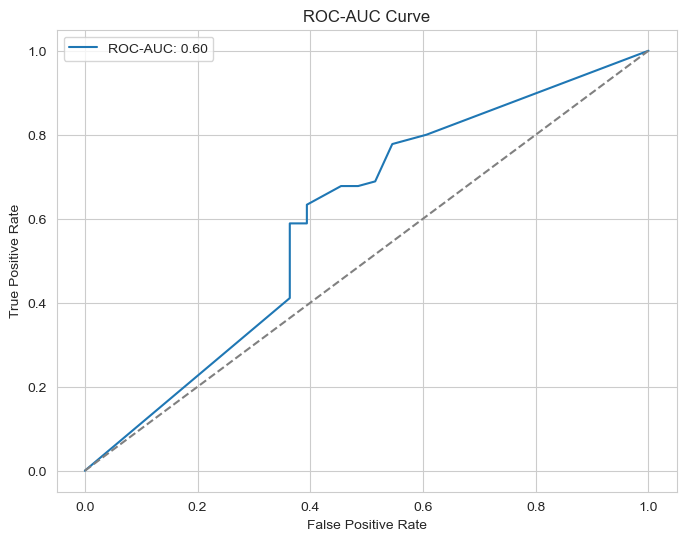

In [122]:
# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC-AUC: {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

<span style="font-size:12px; font-weight:bold;">c.Random Forest Classifier

In [125]:
rf = RandomForestClassifier(max_depth = 2, random_state = 42)
#train the logistic regression classifier
rf.fit(x_train_resampled, y_train_resampled)
#making predictions on the model
y_pred = rf.predict(x_test)
y_proba = rf.predict_proba(x_test)[:, 1]
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy on test set: 0.5609756097560976
[[17 16]
 [38 52]]
              precision    recall  f1-score   support

           0       0.31      0.52      0.39        33
           1       0.76      0.58      0.66        90

    accuracy                           0.56       123
   macro avg       0.54      0.55      0.52       123
weighted avg       0.64      0.56      0.59       123



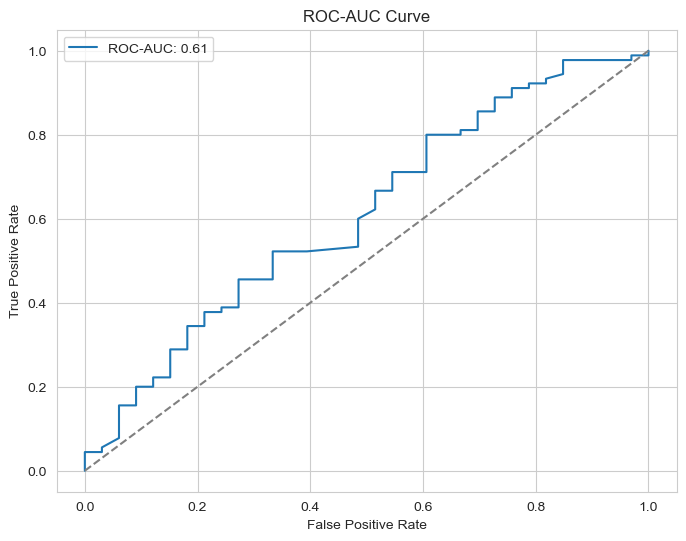

In [126]:
# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC-AUC: {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

<span style="font-size:12px; font-weight:bold;">d.K-Nearest Neighbour Classifier

In [129]:
knn = KNeighborsClassifier(n_neighbors = 13)
#train the logistic regression classifier
knn.fit(x_train_resampled, y_train_resampled)
#making predictions on the model
y_pred = knn.predict(x_test)
y_proba = knn.predict_proba(x_test)[:, 1]
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy on test set: 0.5691056910569106
[[20 13]
 [40 50]]
              precision    recall  f1-score   support

           0       0.33      0.61      0.43        33
           1       0.79      0.56      0.65        90

    accuracy                           0.57       123
   macro avg       0.56      0.58      0.54       123
weighted avg       0.67      0.57      0.59       123



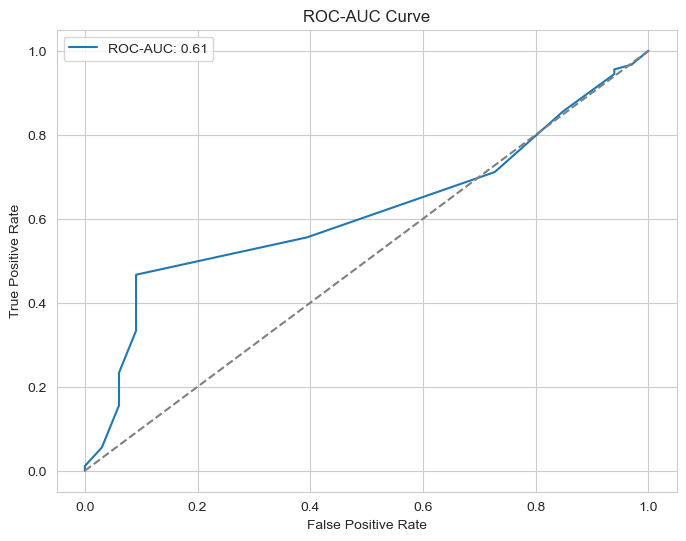

In [130]:
# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC-AUC: {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

In [132]:
svm = SVC(kernel='poly', C=4.0, probability=True)
svm.fit(x_train_resampled, y_train_resampled)
#making predictions on the model
y_pred = knn.predict(x_test)
y_proba = knn.predict_proba(x_test)[:, 1]
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy on test set: 0.5691056910569106
[[20 13]
 [40 50]]
              precision    recall  f1-score   support

           0       0.33      0.61      0.43        33
           1       0.79      0.56      0.65        90

    accuracy                           0.57       123
   macro avg       0.56      0.58      0.54       123
weighted avg       0.67      0.57      0.59       123



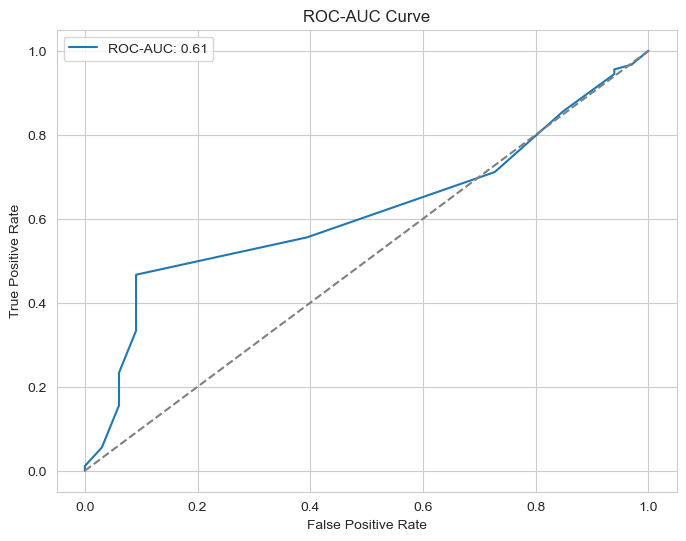

In [133]:
# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC-AUC: {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

<span style="font-size:12px; font-weight:bold;">
From the ROC-AUC results:
    
a.The models perform slightly better than random guessing .

b.It has some predictive power, but it is not strong enough for reliable loan default predictions.


<span style="font-size:12px; font-weight:bold;">
The possible Improvements of the model are:

a.Model Tuning using Parameters such as GridSearchCV

<span style="font-size:16px; font-weight:bold;">4. Saving the Trained Logistic Regression Model

In [152]:
#saving the model
joblib.dump(lr, 'lr_joblib')

['lr_joblib']

In [156]:
#loading the model to see if it was saved
model = joblib.load('lr_joblib')
model

LogisticRegression(max_iter=18, random_state=42)